#Customer Segmentation for Personalized Marketing in Food Delivery Services using Clustering and PCA

##Problem Statement:
In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.

##Project Goal:
The goal of this project is to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.

##Learning Objectives
Data Understanding & Exploration
1. Load and inspect food delivery user data to understand variable types (e.g., numeric
vs. categorical), ranges, and distributions.

2. Summarize and interpret key statistical properties (mean, median, standard
deviation, skewness) of user behavior features like Age, Total Orders, Average
Spend, etc.

3. Visualize data distributions using histograms, box plots, and pair plots to explore
potential groupings or outliers.

4. Identify relationships between user variables (e.g., App Usage Time and Average
Spend) through correlation matrices and scatter plots.
Data Cleaning & Preprocessing


5. Drop or encode irrelevant or categorical features (e.g., UserID, FavoriteCuisine) as
appropriate for unsupervised learning models.

6. Standardize numerical features using StandardScaler to ensure equal contribution to
distance-based clustering.

7. Evaluate the effect of scaling and dimensionality reduction on the data’s structure
through pre- and post-processing visualizations.
Dimensionality Reduction with PCA

8. Apply Principal Component Analysis (PCA) to reduce high-dimensional data to 2D
for effective visualization of user clusters.

9. Interpret principal components by examining feature loadings to understand which
user behaviors contribute most to variance.

10. Visualize PCA-transformed data to observe potential natural clusters and separation
of user types.
Unsupervised Learning: Clustering

11. Implement K-Means clustering on scaled user data and interpret resulting clusters in
the context of user behavior.

12. Determine the optimal number of clusters using the Elbow Method or Silhouette
Score.

13. Apply Agglomerative (Hierarchical) Clustering and visualize results using
dendrograms to understand hierarchical relationships among users.

14. Compare clustering results from K-Means and Hierarchical Clustering to identify
consistency or divergence in groupings.
Model Evaluation & Visualization

15. Label PCA scatter plots with cluster assignments to visually interpret how users are
grouped in reduced dimensions.

16. Analyze cluster characteristics by computing average values of features within each
cluster (e.g., high spenders, frequent users).

17. Create a cluster profile summary to describe each segment using business-relevant
insights (e.g., “young frequent users,” “older high spenders”).
Critical Thinking & Real-world Framing

18. Frame the clustering output as a customer segmentation strategy for personalized
marketing or product recommendations.

19. Explain how unsupervised learning helps businesses make data-driven decisions in
the absence of labeled training data.

20. Reflect on limitations of clustering models (e.g., sensitivity to scaling, shape of
clusters) and suggest ways to improve (e.g., DBSCAN, inclusion of more behavioral
data).

## Step 1 – Importing Libraries

Various Python libraries are used in this analysis:

- pandas and numpy are used for data handling and numerical operations.
- matplotlib.pyplot and seaborn are used for data visualization.
- sklearn is used for preprocessing the data, reducing dimensions with PCA, and applying clustering techniques like KMeans, Agglomerative Clustering, and DBSCAN.


In [2]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

## Step 2 – Load Data

The dataset is loaded from an online source. It contains user-level data such as age, total number of orders, average spending, and favorite cuisine. This data is stored in a DataFrame and is used for further processing and analysis.


In [3]:
df=pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/food_delivery.csv")
df.head() #view first 5 entries

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


## Step 3 – Summary Statistics

Initial exploration is performed to understand the basic structure of the dataset:

- The total number of rows and columns is identified.
- All column names are displayed.
- Data types, memory usage, and non-null values for each column.
- Basic statistics like mean, median, minimum, and maximum are observed for numerical columns.

These steps provide insight into the dataset and help identify any necessary preprocessing tasks.


In [4]:
df.shape #Check the shape of the dataset

(500, 7)

In [5]:
df.columns #View the names of column present in dataset

Index(['UserID', 'Age', 'TotalOrders', 'AverageSpend', 'FavoriteCuisine',
       'DeliveryRating', 'AppUsageTimePerDay'],
      dtype='object')

In [6]:
df.info() #Finding information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [7]:
df.describe() #Find the statistical summary of the dataset

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


## Step 4 – Check for Missing Values

Missing values in the dataset are identified. Each column is checked to count how many values are missing. This step helps in deciding whether to fill, drop, or handle missing data during preprocessing.

Additionally, the frequency of each unique value in the 'FavoriteCuisine' column is shown to understand the distribution of customer preferences.


In [8]:
# check if there are any null values in the dataset
df.isna().sum()

,0
UserID,0
Age,0
TotalOrders,0
AverageSpend,0
FavoriteCuisine,0
DeliveryRating,0
AppUsageTimePerDay,0


In [9]:
# check for duplicates in the dataset
# This will help us identify if there are any repeated entries in the dataset.
print(df.duplicated().sum())

0


In [10]:
# check the value counts of the 'FavoriteCuisine' column
# This will help us understand the distribution of favorite cuisines among the customers.
df['FavoriteCuisine'].value_counts()

,count
FavoriteCuisine,
Thai,108
Italian,106
Indian,104
Mexican,95
Chinese,87


In [11]:
#selecting all numerical columns from the DataFrame df
#This is useful when you want to perform operations like statistical analysis, plotting, or scaling only on numerical data, while ignoring non-numerical columns like strings or dates.
numercial_cols = df.select_dtypes(include=['int64','float64'])

### Using Label encoder
LabelEncoder is used to convert categorical text data into numerical form. It assigns a unique integer (0, 1, 2, ...) to each unique category in a column.

Many machine learning models work only with numerical input. LabelEncoder helps by transforming labels (like 'Male', 'Female', 'Yes', 'No') into numerical values that models can understand.

In [12]:
le = LabelEncoder()
df['FavoriteCuisine'] = le.fit_transform(df['FavoriteCuisine'])
df['FavoriteCuisine']

,FavoriteCuisine
0,3
1,3
2,3
3,4
4,2
...,...
495,4
496,0
497,4
498,4


### Correlation Matrix

A correlation matrix is a table that shows the pairwise correlation coefficients between multiple variables (usually numerical). It tells us how strongly and in what direction variables are related to each other.

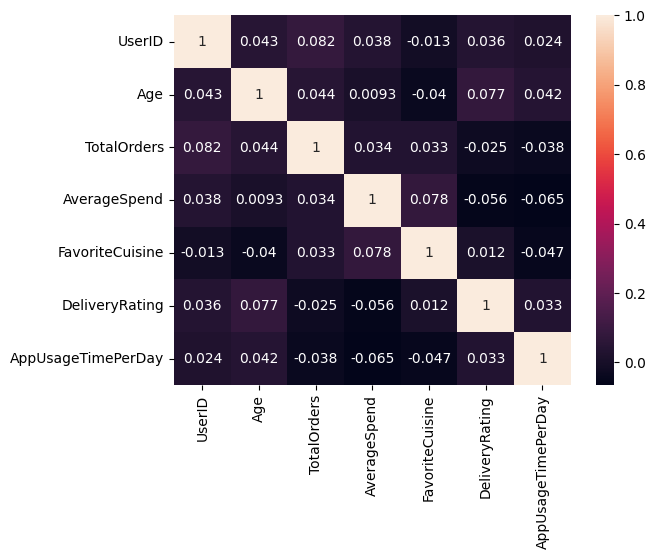

In [14]:
corr = df.corr()
sns.heatmap(corr,annot =True)
plt.show()

## Step 5 – Keep Only Useful Columns

Irrelevant columns like 'UserID' is removed from the dataset because they do not contribute to clustering. The rest of the features, especially numerical ones, are retained for further processing. This step ensures the model focuses only on meaningful attributes.


In [15]:
X = df.drop('UserID',axis=1)
X

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,3,4.6,20.9
1,46,34,193.97,3,3.0,150.2
2,32,22,291.66,3,4.1,59.7
3,25,30,232.21,4,3.7,85.5
4,38,27,244.84,2,4.7,13.7
...,...,...,...,...,...,...
495,56,30,398.62,4,4.3,150.7
496,49,27,423.00,0,3.6,39.0
497,41,31,355.66,4,3.6,15.2
498,40,29,305.66,4,4.1,44.8


## Step 6 – Standardize Your Data

Standardization is applied to scale the data so that all features contribute equally to the clustering algorithms. This process transforms the data to have a mean of 0 and standard deviation of 1. Without scaling, features with larger ranges may dominate the clustering process.


In [16]:
sc = StandardScaler()

In [17]:
X_scaled = sc.fit_transform(X)

## Step 7 – Reduce Dimensions Using PCA

Principal Component Analysis (PCA) is applied to reduce the dataset to two dimensions. This is done to visualize high-dimensional data in 2D space. PCA also helps to remove redundancy in data by combining correlated features into principal components.


In [18]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

## Step 8 – Group Users Using KMeans Clustering

KMeans is an unsupervised machine learning algorithm used to group similar data points into clusters. In this step, the standardized dataset is grouped into 3 clusters using KMeans. The output is a label for each user indicating which cluster they belong to.


In [19]:
kmeans = KMeans(n_clusters =3)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [20]:
centriod_pca = pca.transform(kmeans.cluster_centers_)

## Step 9 – Visualize the Clusters Using a Scatter Plot

The PCA-reduced data is plotted in a 2D scatter plot where each point represents a user. Different colors represent different clusters found by KMeans. This visual helps in understanding how well the clusters are separated in the feature space.


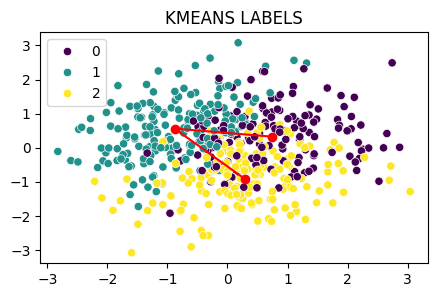

In [21]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = kmeans_labels,palette="viridis")
plt.plot(centriod_pca[:,0],centriod_pca[:,1],color='red',marker='o')
plt.title("KMEANS LABELS")
plt.show()

## Step 10 – Group Users with Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering method. It starts with each user as its own cluster and merges the closest pairs until the required number of clusters is formed. This method is effective when data contains nested group structures.


In [22]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

## Step 11 – Visualize Clusters Using Agglomerative Clustering

A scatter plot is created to visualize the output from Agglomerative Clustering. Each user is shown as a point in PCA space, colored according to the cluster they belong to. This plot helps compare the performance of Agglomerative Clustering with KMeans.


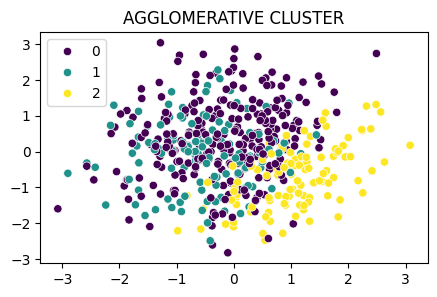

In [23]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=agglo_labels,palette="viridis")
plt.title("AGGLOMERATIVE CLUSTER")
plt.show()

## Step 12 – Build a Dendrogram to Visualize Cluster Formation

A dendrogram is a tree-like diagram that shows the merging of clusters at each step in hierarchical clustering. It helps to understand how clusters are formed and can be used to decide the optimal number of clusters by observing where large vertical gaps exist.


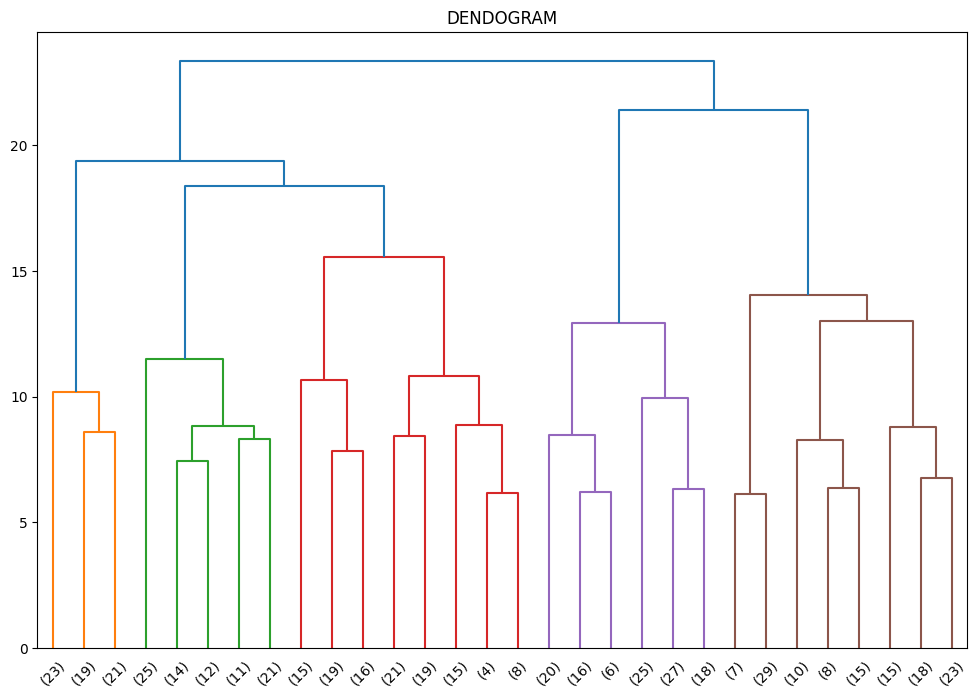

In [24]:
plt.figure(figsize=(12,8))
link = linkage(X_scaled,method='ward')
dendrogram(link,p=30,truncate_mode='lastp')
plt.title("DENDOGRAM")
plt.show()

## Step 13 – Discover User Patterns with DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is applied to identify clusters of users based on data density. Unlike KMeans, DBSCAN can find arbitrarily shaped clusters and can also detect outliers as noise points.


In [25]:
db = DBSCAN(eps=1.5,min_samples=5)
db_labels = db.fit_predict(X_scaled)

## Step 14 – Visualize DBSCAN Clustering with a Scatter Plot

The results of DBSCAN clustering are visualized using a 2D scatter plot of PCA components. Each point is colored by its cluster label. Noise points, which do not belong to any cluster, are typically shown in a separate color (e.g., gray or black).


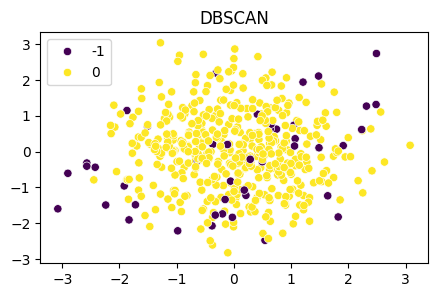

In [26]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=x_pca[:,1],y=x_pca[:,0],hue=db_labels,palette="viridis")
plt.title("DBSCAN")
plt.show()

## Final Conclusion

This project successfully applied various unsupervised machine learning techniques to segment users of a food delivery application based on their behavioral and preference data.It includes data cleaning, encoding categorical features, and standardizing numerical values. Principal Component Analysis (PCA) was used to reduce the dimensionality of the dataset, enabling clear visualizations and improving clustering performance.

Multiple clustering algorithms were then explored, including KMeans, Agglomerative Clustering, and DBSCAN. Each algorithm revealed different structures and patterns in the data. KMeans provided a fast and efficient partitioning of users into three distinct groups based on similarities. Agglomerative Clustering helped understand how users could be merged hierarchically, and the dendrogram visualization provided deeper insights into the grouping structure. DBSCAN allowed the detection of arbitrary-shaped clusters and successfully identified outlier users who did not fit into any of the main groups.

Overall, the clustering analysis demonstrated that users of the food delivery service exhibit diverse behaviors and preferences, which can be effectively captured and grouped using unsupervised learning techniques.
